# Bayesian Networks in ai-Python

#### E1) Optain a copy of aipython:

Download the latest version (0.9.13) of aipython from 
    https://artint.info/AIPython/
    
This library (provided as a zip-file) contains all implementation for the book Artificial Intelligence: Foundations of Computational Agents by David L. Poole and Alan K. Mackworth. It is designed to be as simple as possible (not as performant as possible) without large additional libraries etc.

#### E2) Get familiar with the following Files:
- ```variable.py```
- ```probFactors.py``` (in particular classes: ```Prob(CPD,TabFactor)``` and ```FactorSum```)
- ```probGraphicalModels.py```
- ```probVE```

by looking into the code and reading the corresponding sections in aipython.pdf (also contained in the zip-file.)

In [1]:
import sys
sys.path.append("aipython")

from variable import Variable
from probFactors import Prob
from probGraphicalModels import BeliefNetwork, InferenceMethod
from probVE import VE


In [2]:

########################################################################################
# simple utility functions to simplify life a little
########################################################################################

# print (lists of) probabilities nicely with a given accuracy
def p2s(p, acc=5):
    fmt = '%%.%if' % acc
    if isinstance(p, float): return fmt % p
    if isinstance(p, int):   return fmt % p
    if isinstance(p, list):  return "[" + (', '.join([p2s(e) for e in p])) + "]"

print(p2s(3.1415931415926535))


3.14159


In [3]:
# convert a variable name and value into a human-reabable form
# this simply converts boolean variables as follows:
# Variable = True    ->   "variable"
# Variable = False   ->  "-variable"
# Variable = Value   ->  "Variable=Value"  otherwise
def nv2s(name, value, translate=True):
    if translate:
        if value == True: return name.lower()
        if value == False: return '-' + name.lower()
    # if the value is not booleand or should not be translated, just output 
    return '%s=%s' % (name, value)

print(nv2s('A', True))
print(nv2s('A', False))
print(nv2s('B', 3))

a
-a
B=3


In [4]:

# show a query result using the given inference method, query variable and observations
# shows a nicely readable version of the output
# shows short-hand notation for boolean domains if requested
def show_query_result(inference_method, qvar, obs={}, nice_booleans=True, doprint=True):
    qvar_name = qvar.name
    nice_booleans &= True in qvar.domain
    if nice_booleans: qvar_name = qvar_name.lower()

    if obs == {}:
        qs = "P(%s)" % (qvar_name)
    else:
        qs = "P(%s | %s)" % (qvar_name, ', '.join([nv2s(v.name,va,translate=nice_booleans) for (v,va) in obs.items() ]))
    inference_method.display(1, "%s\nCompute %s ..." % ('-'*50 ,qs))
    r = inference_method.query(qvar, obs)

    if nice_booleans:
        rs = p2s(r[True])
        result = f"{qs} = {rs}"
    else:
        rs = { k:p2s(v)  for (k,v) in r.items() } 
        result = "%{qs} = {rs}"

    if doprint:
        print(result)
    else:
        return result, rs


########################################################################################
# make the method to be available as class-method for variable elimination ...
# weird enough that Python allows life patching of classes
InferenceMethod.show_query_result = show_query_result


P(fire) = 0.01000
P(smoke) = 0.01890
P(smoke | fire) = 0.90000


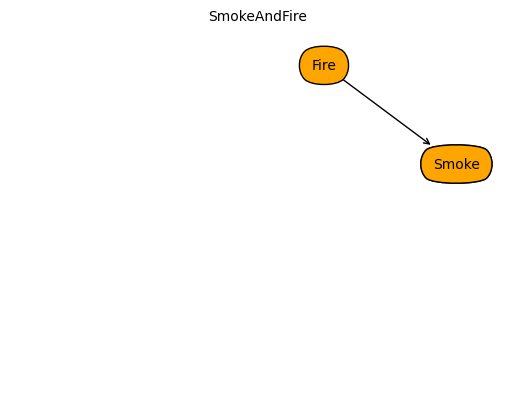

In [5]:
########################################################################################
# example code ...

boolean = [False, True]

Fire =    Variable("Fire",    boolean,  position=(0.633,0.9))
Smoke =   Variable("Smoke",   boolean,  position=(0.9,0.633))

f_fi = Prob(Fire,[],[0.99,0.01])
f_sm = Prob(Smoke,[Fire],[[0.99,0.01],[0.1,0.9]])
bn = BeliefNetwork("SmokeAndFire", {Fire,Smoke}, {f_fi, f_sm})

bn.show()

bnve = VE(bn)    # answers queries using variable elimination
bnve.max_display_level = 0   # select the amount of information to be shown

# show some queries ...
bnve.show_query_result(Fire,  {})
bnve.show_query_result(Smoke, {})
bnve.show_query_result(Smoke,  {Fire:True})




The following cell shows the CPTs for the two variables Smoke and Fire:

In [6]:
print(f_sm.to_table()+"\n")
print(f_fi.to_table())


Fire	Smoke	f30
False	False	0.990000
False	True	0.010000
True	False	0.100000
True	True	0.900000

Fire	f29
False	0.990000
True	0.010000


#### E3) Interprete at the output of the following cell!


In [7]:
bnve.max_display_level = 3   # select the amount of information to be shown
bnve.show_query_result(Smoke, {})


--------------------------------------------------
Compute P(smoke) ...
eliminating  Fire
Multiplying: ['P(Smoke|Fire)', 'P(Fire)']
Creating factor: f35(Smoke)
Smoke	f35
False	0.981100
True	0.018900
Unnormalized probs: [0.9811, 0.0189] Prob obs: 1.0
P(smoke) = 0.01890


#### E4) Compute $P(Smoke=\top)$ manually as follows:

- specify factor $f_1$ to be $P(\text{Smoke}\mid\text{Fire})$
- specify factor $f_2$ to be $P(\text{Fire})$
- compute $f_3 = f_1 * f_2$
- compute $f_4 = \sum_F f_3$
- compute $f_5 = f_4^\text{smoke}$


#### E5) Extend the network to cover the full example from the lecture, i.e., including the RVs Alarm, Leaving, Report, Tamper


In [8]:

boolean = [False, True]
Alarm =   Variable("Alarm",   boolean,  position=(0.366,0.633))
Fire =    Variable("Fire",    boolean,  position=(0.633,0.9))
Leaving = Variable("Leaving", boolean,  position=(0.366,0.366))
Report =  Variable("Report",  boolean,  position=(0.366,0.1))
Smoke =   Variable("Smoke",   boolean,  position=(0.9,0.633))
Tamper =  Variable("Tamper",  boolean,  position=(0.1,0.9))

# to be completed …



#### E6) Crosscheck your results from T06

In [9]:
bnve.max_display_level = 0   # select the amount of information to be shown

# Ex T06 8a)
bnve.show_query_result(Fire,  {})




P(fire) = 0.50000


---- 
# A Simple Diagnostic Network

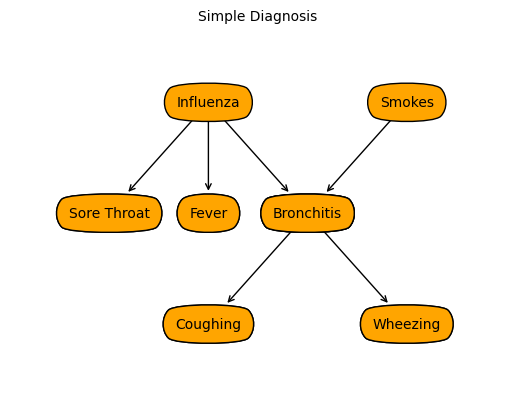

In [10]:
# Belief network simple-diagnostic example (Exercise 9.3 shown in Figure 9.39) of
# Poole and Mackworth, Artificial Intelligence, 2023 http://artint.info

Influenza =   Variable("Influenza",   boolean,  position=(0.4,0.8))
Smokes =      Variable("Smokes",      boolean,  position=(0.8,0.8))
SoreThroat =  Variable("Sore Throat", boolean,  position=(0.2,0.5))
Fever =       Variable("Fever",       boolean,  position=(0.4,0.5))
Bronchitis =  Variable("Bronchitis",  boolean,  position=(0.6,0.5))
Coughing =    Variable("Coughing",    boolean,  position=(0.4,0.2))
Wheezing =    Variable("Wheezing",    boolean,  position=(0.8,0.2))

p_infl =    Prob(Influenza,[],[0.95,0.05])
p_smokes =  Prob(Smokes,[],[0.8,0.2])
p_sth =     Prob(SoreThroat,[Influenza],[[0.999,0.001],[0.7,0.3]])
p_fever =   Prob(Fever,[Influenza],[[0.99,0.05],[0.9,0.1]])
p_bronc =   Prob(Bronchitis,[Influenza,Smokes],[[[0.9999, 0.0001], [0.3, 0.7]], [[0.1, 0.9], [0.01, 0.99]]])
p_cough =   Prob(Coughing,[Bronchitis],[[0.93,0.07],[0.2,0.8]])
p_wheeze =  Prob(Wheezing,[Bronchitis],[[0.999,0.001],[0.4,0.6]])

simple_diagnosis = BeliefNetwork("Simple Diagnosis",
                    {Influenza, Smokes, SoreThroat, Fever, Bronchitis, Coughing, Wheezing},
                    {p_infl, p_smokes, p_sth, p_fever, p_bronc, p_cough, p_wheeze})

simple_diagnosis.show()

sdve = VE(simple_diagnosis)    # answers queries using variable elimination


#### E7) Define interesting queries for this network - Questions you allways had about that domain!

In [11]:
sdve.show_query_result(Smokes, {Coughing:True})

# to be completed 

--------------------------------------------------
Compute P(smokes | coughing) ...
Unnormalized probs: [0.08446569920000002, 0.12273259999999997] Prob obs: 0.2071982992
P(smokes | coughing) = 0.59234


#### E8) The posterior probabilities of which variables change when $Smokes$ is observed? 
That is, for which $X$ is $P(X|smokes) \ne P(X)$?


#### E9) Proove $\text{Influenca} \perp\!\!\!\perp \text{Smokes}$!

#### E10) Translate the example to pyAgrum and crosscheck results!